# Import libraries and dataset

In [1]:
# For managing / transforming the data
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For the ML models
from sklearn import preprocessing, linear_model, ensemble
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
import xgboost as xgb

# For deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

# For warning filtering
import warnings
warnings.filterwarnings('ignore')

In [2]:
hotel_data = pd.read_csv('dataset/hotel_bookings.csv')

In [3]:
hotel_data_backup = hotel_data.copy(deep = True)

# Reviewing the data

In [4]:
# To show all the columns of the large dataset
pd.set_option('display.max_columns', None)

In [5]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
hotel_data.shape

(119390, 32)

In [7]:
hotel_data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
# Number of unique inputs for each column 
# To get a sense of the variable type for each column
hotel_data.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

In [9]:
hotel_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
# Columns with null values
hotel_null_cols = hotel_data.isnull().sum()
hotel_null_cols[hotel_null_cols > 0]

children         4
country        488
agent        16340
company     112593
dtype: int64

# Basic cleaning

Based on the data review above, it shows that there are null values for certain columns. Since there are only 5 unique input types for `children`, the null values will be replaced with the median value, which is zero. Whereas for `country`, `agent` and `company`, the null values will be retained for the time being. These columns may be transformed later on depending on the models used.

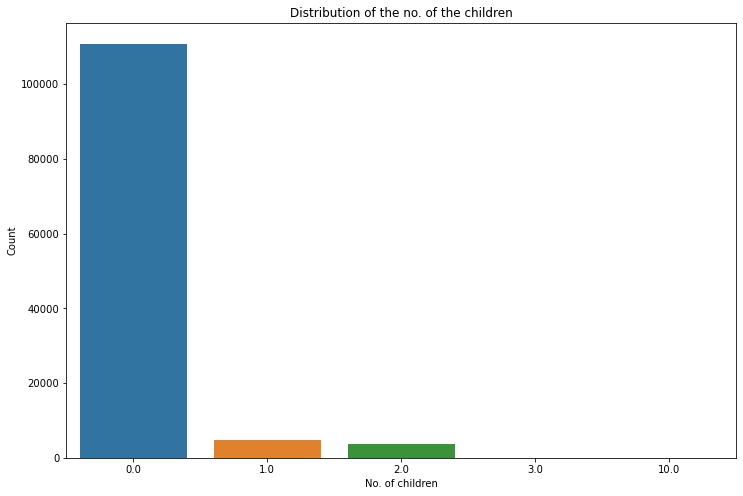

In [11]:
# Visualizing the distribution of inputs for the children column
plt.figure(figsize = (12, 8))
sns.countplot(data = hotel_data, x = 'children')
plt.title('Distribution of the no. of the children')
plt.xlabel('No. of children')
plt.ylabel('Count')
plt.show()

In [12]:
# Replace the null values for the children column with 0
hotel_data['children'].fillna(0.0, inplace = True)
hotel_data['children'] = hotel_data['children'].astype(int)

In [13]:
hotel_data['children'].isnull().sum()

0

In [14]:
hotel_data['children'].dtype

dtype('int64')

# Feature engineering

The following code creates a new feature containing:
* `revenue` - using `adr` x (`stays_in_weekend_nights` + `stays_in_week_nights`)

In [15]:
# Revenue column 
hotel_data['revenue'] = hotel_data['adr'] * (hotel_data['stays_in_weekend_nights'] + hotel_data['stays_in_week_nights'])

In [16]:
hotel_data.head(15)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,revenue
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.00
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.00
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.00
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.00
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,196.00
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,196.00
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03,214.00
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03,206.00
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06,246.00
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22,316.50


In [17]:
hotel_data.shape

(119390, 33)

# Lower funnel: Conversion

Looking at the cancellation predictions for Combined, Resort and City hotels.

In [18]:
hotel_lower = hotel_data.copy(deep = True)
resort_lower = hotel_lower[hotel_lower['hotel'] == 'Resort Hotel']
city_lower = hotel_lower[hotel_lower['hotel'] == 'City Hotel']

In [19]:
len(resort_lower) / len(city_lower)

# Resort Hotel - 1/3 of the full data
# City Hotel - 2/3 of the full data

0.5049792008067566

## Select features

In [20]:
cancel_corr = hotel_lower.corr()['is_canceled']

In [21]:
cancel_corr.abs().sort_values(ascending = False)[1:]

lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
revenue                           0.046562
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005036
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

From the list above, it shows that the top 5 numerical features that are correlated to `is_canceled` are:
- `lead_time`
- `total_of_special_requests`
- `required_car_parking_spaces`
- `booking_changes` 
- `previous_cancellations`

In [22]:
hotel_lower['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [23]:
hotel_lower['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

A crucial categorical feature to exclude will be `reservation_status` as it has a strong correlation to `is_canceled`.

In [24]:
# 4 columns to be excluded:
# - arrival_date_year
# - reservation_status 
# - reservation_status_date
# - country: excluded to make the model more generic

num_features = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
                'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
                'babies', 'is_repeated_guest', 'previous_cancellations',
                'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
                'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests', 
                'adr', 'revenue']

cat_features = ['hotel', 'arrival_date_month', 'meal', 'market_segment',
                'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                'deposit_type', 'customer_type']

lower_features = num_features + cat_features

In [25]:
# Check - 5 includes the 4 excluded columns plus the 'is_canceled' target variable
len(hotel_lower.columns) == len(lower_features) + 5

True

In [26]:
# Combined
x_lower = hotel_lower.drop(columns = ['is_canceled'])
x_lower = x_lower.loc[:, lower_features]
y_lower = hotel_lower.loc[:, 'is_canceled']

# Resort
x_resort_lower = resort_lower.drop(columns = ['is_canceled'])
x_resort_lower = x_resort_lower.loc[:, lower_features]
y_resort_lower = resort_lower.loc[:, 'is_canceled']

# City
x_city_lower = city_lower.drop(columns = ['is_canceled'])
x_city_lower = x_city_lower.loc[:, lower_features]
y_city_lower = city_lower.loc[:, 'is_canceled']

In [27]:
x_lower.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,adr,revenue,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
0,342,27,1,0,0,2,0,0,0,0,0,3,NaN,NaN,0,0,0,0.0,0.0,Resort Hotel,July,BB,Direct,Direct,C,C,No Deposit,Transient
1,737,27,1,0,0,2,0,0,0,0,0,4,NaN,NaN,0,0,0,0.0,0.0,Resort Hotel,July,BB,Direct,Direct,C,C,No Deposit,Transient
2,7,27,1,0,1,1,0,0,0,0,0,0,NaN,NaN,0,0,0,75.0,75.0,Resort Hotel,July,BB,Direct,Direct,A,C,No Deposit,Transient
3,13,27,1,0,1,1,0,0,0,0,0,0,304.0,NaN,0,0,0,75.0,75.0,Resort Hotel,July,BB,Corporate,Corporate,A,A,No Deposit,Transient
4,14,27,1,0,2,2,0,0,0,0,0,0,240.0,NaN,0,0,1,98.0,196.0,Resort Hotel,July,BB,Online TA,TA/TO,A,A,No Deposit,Transient


In [28]:
x_city_lower.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,adr,revenue,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type
40060,6,27,1,0,2,1,0,0,0,0,0,0,6.0,NaN,0,0,0,0.0,0.0,City Hotel,July,HB,Offline TA/TO,TA/TO,A,A,No Deposit,Transient
40061,88,27,1,0,4,2,0,0,0,0,0,0,9.0,NaN,0,0,1,76.5,306.0,City Hotel,July,BB,Online TA,TA/TO,A,A,No Deposit,Transient
40062,65,27,1,0,4,1,0,0,0,0,0,0,9.0,NaN,0,0,1,68.0,272.0,City Hotel,July,BB,Online TA,TA/TO,A,A,No Deposit,Transient
40063,92,27,1,2,4,2,0,0,0,0,0,0,9.0,NaN,0,0,2,76.5,459.0,City Hotel,July,BB,Online TA,TA/TO,A,A,No Deposit,Transient
40064,100,27,2,0,2,2,0,0,0,0,0,0,9.0,NaN,0,0,1,76.5,153.0,City Hotel,July,BB,Online TA,TA/TO,A,A,No Deposit,Transient


In [29]:
y_city_lower.head()

40060    0
40061    1
40062    1
40063    1
40064    1
Name: is_canceled, dtype: int64

## Transform features

In [30]:
# Numerical features
# Fill null values with 0
x_lower.fillna(0.0, inplace = True)
x_resort_lower.fillna(0.0, inplace = True)
x_city_lower.fillna(0.0, inplace = True)

# Standardize features (Z-score)
x_lower[num_features] = preprocessing.scale(x_lower[num_features])
x_resort_lower[num_features] = preprocessing.scale(x_resort_lower[num_features])
x_city_lower[num_features] = preprocessing.scale(x_city_lower[num_features])

In [31]:
# Categorical features
# For arrival_date_month
months_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
x_lower.loc[:, 'arrival_date_month'] = x_lower['arrival_date_month'].replace(months_mapping)
x_resort_lower.loc[:, 'arrival_date_month'] = x_resort_lower['arrival_date_month'].replace(months_mapping)
x_city_lower.loc[:, 'arrival_date_month'] = x_city_lower['arrival_date_month'].replace(months_mapping)

# One-hot encode the remaining categorical features
# For combined hotel dataset
cat_features_full = ['hotel', 'meal', 'market_segment', 'distribution_channel', 
                     'reserved_room_type', 'assigned_room_type', 'deposit_type', 
                     'customer_type']

x_lower = pd.get_dummies(x_lower, columns = cat_features_full)

# For separated hotel datasets (remove 'hotel' column)
cat_features_split = ['meal', 'market_segment', 'distribution_channel', 
                     'reserved_room_type', 'assigned_room_type', 'deposit_type', 
                     'customer_type']

x_resort_lower = x_resort_lower.drop(columns = ['hotel'])
x_resort_lower = pd.get_dummies(x_resort_lower, columns = cat_features_split)

x_city_lower = x_city_lower.drop(columns = ['hotel'])
x_city_lower = pd.get_dummies(x_city_lower, columns = cat_features_split)

In [32]:
x_lower.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,adr,revenue,arrival_date_month,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,2.227051,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,4.260101,-0.698406,-0.199748,-0.131924,-0.254873,-0.720694,-2.015038,-1.065314,7,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,5.923385,-0.012141,-1.685297,-0.92889,-1.310240,0.247897,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,5.793131,-0.698406,-0.199748,-0.131924,-0.254873,-0.720694,-2.015038,-1.065314,7,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,-0.907814,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,-0.698406,-0.199748,-0.131924,-0.254873,-0.720694,-0.530935,-0.842039,7,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,-0.851667,-0.012141,-1.685297,-0.92889,-0.786207,-1.478447,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,2.138963,-0.199748,-0.131924,-0.254873,-0.720694,-0.530935,-0.842039,7,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,-0.842309,-0.012141,-1.685297,-0.92889,-0.262174,0.247897,-0.260659,-0.081579,-0.18156,-0.10318,-0.091555,-0.338990,1.541622,-0.199748,-0.131924,-0.254873,0.540666,-0.075810,-0.481822,7,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [33]:
x_lower.describe()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,adr,revenue,arrival_date_month,hotel_City Hotel,hotel_Resort Hotel,meal_BB,meal_FB,meal_HB,meal_SC,meal_Undefined,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
count,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,1.193900e+05,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.00000,119390.000000,119390.000000,119390.000000
mean,3.358325e-16,4.093983e-15,-9.159196e-16,3.928971e-14,-2.182022e-14,5.708995e-15,-6.989886e-16,5.955017e-15,-3.493540e-14,1.741766e-14,-1.286381e-15,-7.015186e-14,-1.244707e-13,-4.008632e-14,-1.846956e-14,1.359733e-13,1.044865e-13,1.441786e-14,2.586817e-15,6.552483,0.664461,0.335539,0.773180,0.006684,0.121141,0.089203,0.009791,0.001985,0.006223,0.044350,0.105587,0.165935,0.202856,0.473046,0.000017,0.055926,0.122665,0.001617,0.819750,0.000042,0.720278,0.009364,0.007806,0.160826,0.054737,0.024265,0.017539,0.005034,0.000050,0.000101,0.620261,0.018117,0.019893,0.212095,0.065382,0.031418,0.021384,0.005964,0.003040,0.002337,0.000008,0.000101,0.876464,0.122179,0.001357,0.03414,0.004833,0.750591,0.210436
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,3.090619,0.472181,0.472181,0.418777,0.081482,0.326292,0.285038,0.098466,0.044510,0.078642,0.205873,0.307309,0.372024,0.402128,0.499275,0.004093,0.229780,0.328054,0.040174,0.384397,0.006471,0.448864,0.096315,0.088008,0.367372,0.227466,0.153871,0.131269,0.070772,0.007089,0.010025,0.485324,0.133375,0.139632,0.408793,0.247200,0.174445,0.144660,0.076994,0.055057,0.048285,0.002894,0.010025,0.329053,0.327494,0.036811,0.18159,0.069351,0.432673,0.407620
min,-9.733187e-01,-1.923191e+00,-1.685297e+00,-9.288904e-01,-1.310240e+00,-3.204792e+00,-2.606586e-01,-8.157926e-02,-1.815604e-01,-1.031795e-01,-9.155477e-02,-3.389899e-01,-6.984065e-01,-1.997484e-01,-1.319236e-01,-2.548729e-01,-7.206941e-01,-

In [34]:
x_city_lower.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,adr,revenue,arrival_date_month,meal_BB,meal_FB,meal_HB,meal_SC,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_A,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_P,assigned_room_type_A,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_K,assigned_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
40060,-0.934996,-0.013244,-1.694083,-0.898493,-0.125622,-1.670911,-0.245496,-0.058601,-0.162135,-0.191934,-0.078169,-0.307861,-0.355752,-0.168745,-0.154607,-0.157286,-0.700484,-2.415092,-1.303034,7,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
40061,-0.195909,-0.013244,-1.694083,-0.898493,1.247620,0.292610,-0.245496,-0.058601,-0.162135,-0.191934,-0.078169,-0.307861,-0.300339,-0.168745,-0.154607,-0.157286,0.580301,-0.660612,-0.051777,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
40062,-0.403214,-0.013244,-1.694083,-0.898493,1.247620,-1.670911,-0.245496,-0.058601,-0.162135,-0.191934,-0.078169,-0.307861,-0.300339,-0.168745,-0.154607,-0.157286,0.580301,-0.855554,-0.190805,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
40063,-0.159856,-0.013244,-1.694083,1.361341,1.247620,0.292610,-0.245496,-0.058601,-0.162135,-0.191934,-0.078169,-0.307861,-0.300339,-0.168745,-0.154607,-0.157286,1.861085,-0.660612,0.573852,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
40064,-0.087750,-0.013244,-1.579514,-0.898493,-0.125622,0.292610,-0.245496,-0.058601,-0.162135,-0.191934,-0.078169,-0.307861,-0.300339,-0.168745,-0.154607,-0.157286,0.580301,-0.660612,-0.677406,7,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [35]:
x_resort_lower = x_resort_lower.reset_index(drop = True)
y_resort_lower = y_resort_lower.reset_index(drop = True)

x_city_lower = x_city_lower.reset_index(drop = True)
y_city_lower = y_city_lower.reset_index(drop = True)

## Logistic regression

In [36]:
x_compile = [x_lower, x_resort_lower, x_city_lower]
y_compile = [y_lower, y_resort_lower, y_city_lower]

hotel_names = ['Combined', 'Resort', 'City']

In [37]:
# Split data into kfolds for cross validation (with shuffle)
num_folds = 5
skf = StratifiedKFold(n_splits = num_folds, shuffle = True, random_state = 2023)

In [38]:
# Define evaluation metrics for cross validation
scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score),
           'auc': make_scorer(roc_auc_score)}

### Basic model

In [39]:
log_regr = linear_model.LogisticRegression(solver = 'lbfgs', max_iter = 10000, random_state = 2023)

In [40]:
# Logistic regression for each hotel type
for i in range(len(x_compile)):
    
    # Perform cross-validation and calculate evaluation metrics
    cv_results = cross_validate(log_regr, x_compile[i], y_compile[i], cv = skf, scoring = scoring)

    # Print average evaluation metrics across all folds
    print('-' * 40)
    print('Evaluation report for ' + hotel_names[i] + ' hotel')
    print('Accuracy:', round(np.mean(cv_results['test_accuracy']), 2))
    print('Precision:', round(np.mean(cv_results['test_precision']), 2))
    print('Recall:', round(np.mean(cv_results['test_recall']), 2))
    print('F1-score:', round(np.mean(cv_results['test_f1']), 2))
    print('AUC:', round(np.mean(cv_results['test_auc']), 2))

----------------------------------------
Evaluation report for Combined hotel
Accuracy: 0.81
Precision: 0.83
Recall: 0.62
F1-score: 0.71
AUC: 0.77
----------------------------------------
Evaluation report for Resort hotel
Accuracy: 0.82
Precision: 0.75
Recall: 0.54
F1-score: 0.63
AUC: 0.74
----------------------------------------
Evaluation report for City hotel
Accuracy: 0.81
Precision: 0.85
Recall: 0.66
F1-score: 0.74
AUC: 0.79


### With AdaBoost

In [41]:
ada_log_regr = ensemble.AdaBoostClassifier(base_estimator = log_regr, random_state = 2023)

In [42]:
# AdaBoost for each hotel type
for i in range(len(x_compile)):

    # Perform cross-validation and calculate evaluation metrics
    cv_results = cross_validate(ada_log_regr, x_compile[i], y_compile[i], cv = skf, scoring = scoring)

    # Print average evaluation metrics across all folds
    print('-' * 40)
    print('Evaluation report for ' + hotel_names[i] + ' hotel')
    print('Accuracy:', round(np.mean(cv_results['test_accuracy']), 2))
    print('Precision:', round(np.mean(cv_results['test_precision']), 2))
    print('Recall:', round(np.mean(cv_results['test_recall']), 2))
    print('F1-score:', round(np.mean(cv_results['test_f1']), 2))
    print('AUC:', round(np.mean(cv_results['test_auc']), 2))

----------------------------------------
Evaluation report for Combined hotel
Accuracy: 0.8
Precision: 0.82
Recall: 0.59
F1-score: 0.68
AUC: 0.75
----------------------------------------
Evaluation report for Resort hotel
Accuracy: 0.81
Precision: 0.76
Recall: 0.48
F1-score: 0.59
AUC: 0.71
----------------------------------------
Evaluation report for City hotel
Accuracy: 0.8
Precision: 0.84
Recall: 0.64
F1-score: 0.72
AUC: 0.77


## Neural network

In [43]:
# Create a function to define the neural network architecture
def create_nn(input_shape):
    model = Sequential([
        Dense(32, activation = 'relu', input_dim = input_shape),
        Dense(64, activation='relu'),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(48, activation='relu'),
        Dropout(0.1),
        Dense(12, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

In [44]:
# Wrap the neural network function in a KerasClassifier
# Perform cross-validation and calculate evaluation metrics
# Print average evaluation metrics across all folds
for i in range(len(x_compile)):
  nn = KerasClassifier(build_fn = create_nn, input_shape = x_compile[i].shape[1], epochs = 25, batch_size = 32, verbose = 0)
  nn_cv_results = cross_validate(nn, x_compile[i], y_compile[i], cv = skf, scoring = scoring)
  print('-' * 40)
  print('Evaluation report for ' + hotel_names[i] + ' hotel')
  print('Accuracy:', round(np.mean(nn_cv_results['test_accuracy']), 2))
  print('Precision:', round(np.mean(nn_cv_results['test_precision']), 2))
  print('Recall:', round(np.mean(nn_cv_results['test_recall']), 2))
  print('F1-score:', round(np.mean(nn_cv_results['test_f1']), 2))
  print('AUC:', round(np.mean(nn_cv_results['test_auc']), 2))

----------------------------------------
Evaluation report for Combined hotel
Accuracy: 0.84
Precision: 0.82
Recall: 0.73
F1-score: 0.77
AUC: 0.82
----------------------------------------
Evaluation report for Resort hotel
Accuracy: 0.84
Precision: 0.77
Recall: 0.63
F1-score: 0.69
AUC: 0.78
----------------------------------------
Evaluation report for City hotel
Accuracy: 0.84
Precision: 0.86
Recall: 0.75
F1-score: 0.8
AUC: 0.83


## Decison tree

In [45]:
decision_tree = DecisionTreeClassifier(criterion='entropy', random_state=0)

for i in range(len(x_compile)):

    # Perform cross-validation and calculate evaluation metrics
    cv_results = cross_validate(decision_tree, x_compile[i], y_compile[i], cv = skf, scoring = scoring)

    # Print average evaluation metrics across all folds
    print('-' * 40)
    print('Evaluation report for ' + hotel_names[i] + ' hotel')
    print('Accuracy:', round(np.mean(cv_results['test_accuracy']), 2))
    print('Precision:', round(np.mean(cv_results['test_precision']), 2))
    print('Recall:', round(np.mean(cv_results['test_recall']), 2))
    print('F1-score:', round(np.mean(cv_results['test_f1']), 2))
    print('AUC:', round(np.mean(cv_results['test_auc']), 2))

----------------------------------------
Evaluation report for Combined hotel
Accuracy: 0.83
Precision: 0.77
Recall: 0.77
F1-score: 0.77
AUC: 0.82
----------------------------------------
Evaluation report for Resort hotel
Accuracy: 0.83
Precision: 0.69
Recall: 0.71
F1-score: 0.7
AUC: 0.79
----------------------------------------
Evaluation report for City hotel
Accuracy: 0.83
Precision: 0.8
Recall: 0.8
F1-score: 0.8
AUC: 0.83


## XGBoost

In [48]:
xgb_model = xgb.XGBClassifier(random_state=0)

for i in range(len(x_compile)):

    # Perform cross-validation and calculate evaluation metrics
    cv_results = cross_validate(xgb_model, x_compile[i], y_compile[i], cv = skf, scoring = scoring)

    # Print average evaluation metrics across all folds
    print('-' * 40)
    print('Evaluation report for ' + hotel_names[i] + ' hotel')
    print('Accuracy:', round(np.mean(cv_results['test_accuracy']), 2))
    print('Precision:', round(np.mean(cv_results['test_precision']), 2))
    print('Recall:', round(np.mean(cv_results['test_recall']), 2))
    print('F1-score:', round(np.mean(cv_results['test_f1']), 2))
    print('AUC:', round(np.mean(cv_results['test_auc']), 2))

[17:22:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:23:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' t

## Random forest

In [46]:
random_forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)

for i in range(len(x_compile)):

    # Perform cross-validation and calculate evaluation metrics
    cv_results = cross_validate(random_forest, x_compile[i], y_compile[i], cv = skf, scoring = scoring)

    # Print average evaluation metrics across all folds
    print('-' * 40)
    print('Evaluation report for ' + hotel_names[i] + ' hotel')
    print('Accuracy:', round(np.mean(cv_results['test_accuracy']), 2))
    print('Precision:', round(np.mean(cv_results['test_precision']), 2))
    print('Recall:', round(np.mean(cv_results['test_recall']), 2))
    print('F1-score:', round(np.mean(cv_results['test_f1']), 2))
    print('AUC:', round(np.mean(cv_results['test_auc']), 2))

----------------------------------------
Evaluation report for Combined hotel
Accuracy: 0.86
Precision: 0.87
Recall: 0.75
F1-score: 0.8
AUC: 0.84
----------------------------------------
Evaluation report for Resort hotel
Accuracy: 0.87
Precision: 0.82
Recall: 0.66
F1-score: 0.73
AUC: 0.8
----------------------------------------
Evaluation report for City hotel
Accuracy: 0.86
Precision: 0.88
Recall: 0.77
F1-score: 0.83
AUC: 0.85


In [47]:
random_forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)

# Fit the random forest model on the training data
random_forest.fit(x_compile[0], y_compile[0])
    
# Get the feature importances
importances = random_forest.feature_importances_
    
# Sort the importances in descending order
indices = np.argsort(importances)[::-1]
    
# Print the feature ranking - for the combined hotel dataset
print('Feature ranking for ' + hotel_names[0] + ' hotel:')
for f in range(x_compile[0].shape[1]):
    print('%d. %s (%f)' % (f + 1, x_compile[0].columns[indices[f]], importances[indices[f]]))

Feature ranking for Combined hotel:
1. lead_time (0.126546)
2. revenue (0.078910)
3. adr (0.078765)
4. deposit_type_No Deposit (0.069261)
5. arrival_date_day_of_month (0.064095)
6. arrival_date_week_number (0.059926)
7. deposit_type_Non Refund (0.050967)
8. total_of_special_requests (0.050781)
9. agent (0.041574)
10. arrival_date_month (0.035099)
11. stays_in_week_nights (0.034049)
12. previous_cancellations (0.032720)
13. required_car_parking_spaces (0.030967)
14. market_segment_Groups (0.023583)
15. stays_in_weekend_nights (0.022755)
16. booking_changes (0.020239)
17. customer_type_Transient (0.018815)
18. adults (0.013969)
19. assigned_room_type_A (0.012877)
20. market_segment_Online TA (0.011025)
21. customer_type_Transient-Party (0.010170)
22. market_segment_Offline TA/TO (0.008812)
23. distribution_channel_TA/TO (0.007049)
24. reserved_room_type_A (0.006931)
25. market_segment_Direct (0.006701)
26. meal_BB (0.006661)
27. children (0.006582)
28. previous_bookings_not_canceled (0.0

## Evaluating the features

From the reports above, it shows that **random forest** performs best among all the models across the various evaluation metrics. Since the combined hotel dataset is sufficiently accurate in predicting cancellations, we'll be using the top features of the random forest model trained with the combined dataset and exploring the relationships between the features and the `is_canceled` target variable.

The top features of random forest model are:
* `lead_time`
* `adr` / `revenue`
* `deposit_type`


### Lead time

In [37]:
# Group the hotel dataset by lead time and calculate the summary statistics
lead_cancel_data = hotel_lower.groupby('lead_time')["is_canceled"].describe()

In [38]:
lead_cancel_data

,count,mean,std,min,25%,50%,75%,max
lead_time,,,,,,,,
0,6345.0,0.067770,0.251370,0.0,0.0,0.0,0.0,1.0
1,3460.0,0.092775,0.290158,0.0,0.0,0.0,0.0,1.0
2,2069.0,0.102948,0.303965,0.0,0.0,0.0,0.0,1.0
3,1816.0,0.100220,0.300376,0.0,0.0,0.0,0.0,1.0
4,1715.0,0.102624,0.303556,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
622,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
626,30.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
629,17.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [39]:
# Use lead_times wih more than 10 bookings for graph
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data['count'] >= 10]

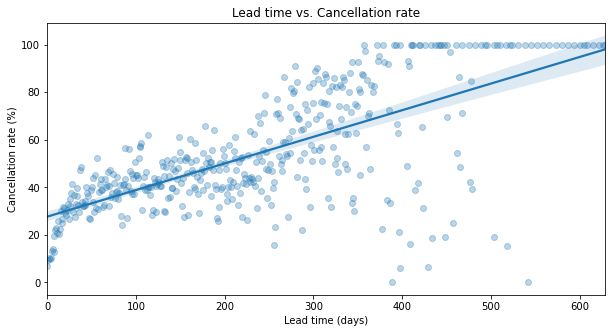

In [40]:
# Plot lead time vs. cancellation rate
plt.figure(figsize = (10, 5))
sns.regplot(x = lead_cancel_data_10.index, y = lead_cancel_data_10['mean'].values * 100, scatter_kws = {'alpha': 0.3})
plt.xlabel('Lead time (days)')
plt.ylabel('Cancellation rate (%)')
plt.title('Lead time vs. Cancellation rate')
plt.show()

Based on the graph above, it shows that as hotel bookings are made further in advance, the cancellation rate increases.

### ADR / Revenue 

#### ADR

In [41]:
# Group the hotel dataset by adr and calculate the summary statistics
adr_cancel_data = hotel_lower.groupby('adr')['is_canceled'].describe()

In [42]:
adr_cancel_data

,count,mean,std,min,25%,50%,75%,max
adr,,,,,,,,
-6.38,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
0.00,1959.0,0.108729,0.311378,0.0,0.0,0.0,0.0,1.0
0.26,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
0.50,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
1.00,15.0,0.200000,0.414039,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
450.00,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
451.50,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
508.00,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0


In [43]:
# Removing the outlier (i.e., adr = 5400)
adr_cancel_data = adr_cancel_data.loc[adr_cancel_data.index < 5400]

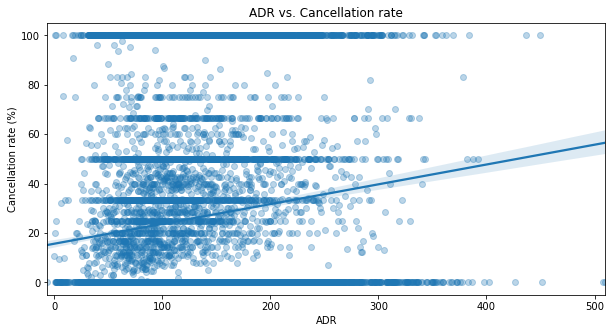

In [44]:
# Plot adr vs. cancellation rate
plt.figure(figsize = (10, 5))
sns.regplot(x = adr_cancel_data.index, y = adr_cancel_data['mean'].values * 100, scatter_kws = {'alpha': 0.3})
plt.xlabel('ADR')
plt.ylabel('Cancellation rate (%)')
plt.title('ADR vs. Cancellation rate')
plt.show()

Based on the graph above, it illustrates that as adr increases, the cancellation rate also increases.

#### Revenue

In [45]:
# Group the hotel dataset by adr and calculate the summary statistics
revenue_cancel_data = hotel_lower.groupby('revenue')['is_canceled'].describe()

In [46]:
revenue_cancel_data

,count,mean,std,min,25%,50%,75%,max
revenue,,,,,,,,
-63.80,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
0.00,1959.0,0.108729,0.311378,0.0,0.0,0.0,0.0,1.0
1.00,1.0,0.000000,NaN,0.0,0.0,0.0,0.0,0.0
2.00,7.0,0.142857,0.377964,0.0,0.0,0.0,0.0,1.0
2.96,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
5400.00,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
6148.00,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
6300.00,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0


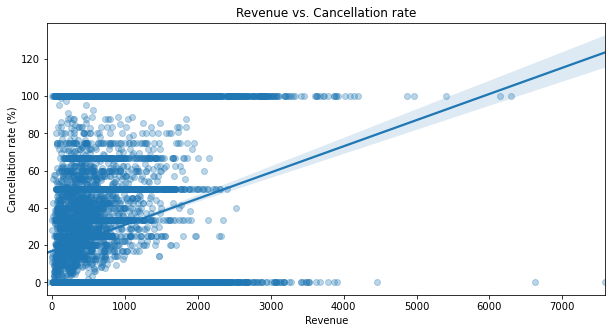

In [47]:
# Plot adr vs. cancellation rate
plt.figure(figsize = (10, 5))
sns.regplot(x = revenue_cancel_data.index, y = revenue_cancel_data['mean'].values * 100, scatter_kws = {'alpha': 0.3})
plt.xlabel('Revenue')
plt.ylabel('Cancellation rate (%)')
plt.title('Revenue vs. Cancellation rate')
plt.show()

Similar to adr, as revenue increases, the cancellation rate also increases. Since both adr and revenue are intuitively correlated as higher revenue can be derived from having a higher price rate, it is expected that both variables have a similar correlation to the cancellation rate.

### Deposit type

In [48]:
# Group the hotel dataset by deposit type and calculate the summary statistics
deposit_cancel_data = hotel_lower.groupby('deposit_type')['is_canceled'].describe()

In [49]:
deposit_cancel_data

,count,mean,std,min,25%,50%,75%,max
deposit_type,,,,,,,,
No Deposit,104641.0,0.283770,0.450829,0.0,0.0,0.0,1.0,1.0
Non Refund,14587.0,0.993624,0.079595,0.0,1.0,1.0,1.0,1.0
Refundable,162.0,0.222222,0.417029,0.0,0.0,0.0,0.0,1.0


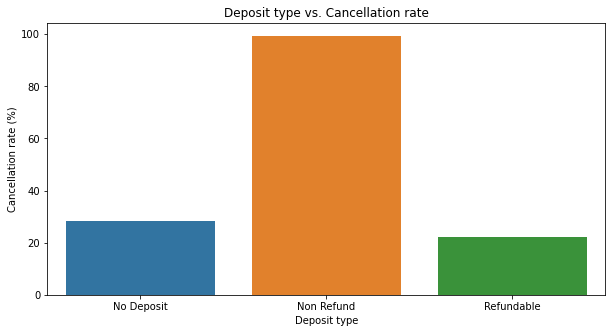

In [50]:
# Plot deposit type vs. cancellation rate
plt.figure(figsize = (10, 5))
sns.barplot(x = deposit_cancel_data.index, y = deposit_cancel_data['mean'].values * 100)
plt.xlabel('Deposit type')
plt.ylabel('Cancellation rate (%)')
plt.title('Deposit type vs. Cancellation rate')
plt.show()

Based on the graph above, it shows that non-refund deposit type has the highest cancellation rate, which is counter-intuitive. As such, further investigation is required to assess the reason.

In [51]:
deposit_mean_data = hotel_lower.groupby('deposit_type').mean()
deposit_r_mean_data = resort_lower.groupby('deposit_type').mean()
deposit_c_mean_data = city_lower.groupby('deposit_type').mean()

In [52]:
deposit_mean_data

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,revenue
deposit_type,,,,,,,,,,,,,,,,,,,,,
No Deposit,0.283770,88.756615,2016.174014,27.135310,15.814652,0.970165,2.556799,1.862597,0.118395,0.009069,0.035760,0.042039,0.154911,0.249634,90.996175,189.496772,1.519347,103.525067,0.071129,0.651427,373.209977
Non Refund,0.993624,212.908891,2016.031466,27.448619,15.595462,0.621718,2.091109,1.811407,0.000617,0.000000,0.004387,0.411462,0.010626,0.012477,55.248165,179.189723,7.992253,89.964017,0.000069,0.001782,248.265366
Refundable,0.222222,152.098765,2016.141975,20.932099,23.456790,0.975309,2.851852,1.907407,0.030864,0.000000,0.024691,0.000000,0.018519,0.592593,189.625000,227.936842,9.586420,76.209753,0.123457,0.141975,302.378889


Looking at the mean values, it shows that non-refund deposit type has the highest average lead time. Since lead time is correlated to cancellation rate, this could be the reason why non-refund deposit type has the highest cancellation rate.

**Business proposition**: Since lead time and adr are correlated to cancellation rate, we propose that more marketing campaigns can be targeted towards people who have made advance hotel bookings and/or greater lodging payments to retain their booking interest.